### Markov Chain Monte Carlo

In statistics, Markov chain Monte Carlo (MCMC) methods comprise a class of algorithms for sampling from a probability distribution. By constructing a Markov chain that has the desired distribution as its equilibrium distribution, one can obtain a sample of the desired distribution by recording states from the chain. The more steps that are included, the more closely the distribution of the sample matches the actual desired distribution. Various algorithms exist for constructing chains, including the Metropolis–Hastings algorithm.

A Markov process is uniquely defined by its transition probabilities $ P(x' | x)$, the probability of transitioning from any given state $x$ to any other given state $x'$. It has a unique stationary distribution $\pi (x)$ when the following two conditions are met:

1. *Existence of stationary distribution*: there must exist a stationary distribution $\pi (x)$. A sufficient but not necessary condition is detailed balance, which requires that each transition$ x\to x'$ is reversible: for every pair of states $x,x'$, the probability of being in state $x$ and transitioning to state $x'$ must be equal to the probability of being in state $x'$ and transitioning to state $x$,$\pi (x)P(x'\mid x) = \pi (x')P(x\mid x')$.

2. *Uniqueness of stationary distribution*: the stationary distribution $\pi (x)$ must be unique. This is guaranteed by ergodicity of the Markov process, which requires that every state must (1) be aperiodic—the system does not return to the same state at fixed intervals; and (2) be positive recurrent—the expected number of steps for returning to the same state is finite.

The Metropolis–Hastings algorithm involves designing a Markov process (by constructing transition probabilities) that fulfills the two above conditions, such that its stationary distribution $\pi (x)$ is chosen to be $P(x)$. The derivation of the algorithm starts with the condition of detailed balance:

$P(x'\mid x)P(x)=P(x\mid x')P(x')$,
which is re-written as

$\frac {P(x'\mid x)}{P(x\mid x')}={\frac {P(x')}{P(x)}}$.

The approach is to separate the transition in two sub-steps; the proposal and the acceptance-rejection. The proposal distribution $g(x'\mid x)$ is the conditional probability of proposing a state $x'$ given $x$, and the acceptance distribution $A(x',x)$ is the probability to accept the proposed state $x'. The transition probability can be written as the product of them:

$P(x'\mid x)=g(x'\mid x)A(x',x)$.

Inserting this relation in the previous equation, we have

$\frac {A(x',x)}{A(x,x')}={\frac {P(x')}{P(x)}}{\frac {g(x\mid x')}{g(x'\mid x)}}$.

The next step in the derivation is to choose an acceptance ratio that fulfills the condition above. One common choice is the Metropolis choice:

$A(x',x)=\min \left(1,{\frac {P(x')}{P(x)}}{\frac {g(x\mid x')}{g(x'\mid x)}}\right)$.

For this Metropolis acceptance ratio $A$, either $A(x',x)=1$ or $A(x,x')=1$ and, either way, the condition is satisfied.

The Metropolis–Hastings algorithm can thus be written as follows:

1. Initialise

    1. Pick an initial state $x_{0}$.
    
    2. Set $t=0$.
    
2. Iterate
    1. Generate a random candidate state $x'$ according to $g(x'\mid x_{t})$.
    
    2. Calculate the acceptance probability $A(x',x_{t})=\min \left(1,{\frac {P(x')}{P(x_{t})}}{\frac {g(x_{t}\mid x')}{g(x'\mid x_{t})}}\right)$.
    
    3. Accept or reject:
    
        1. Generate a uniform random number $u\in [0,1]$;
        
        2. if $u\leq A(x',x_{t})$, then accept the new state and set $x_{t+1}=x'$;
        
        3. if $u>A(x',x_{t})$, then reject the new state, and copy the old state forward $x_{t+1}=x_{t}$.
        
    4. Increment: set $t=t+1$.

#### Velocity of a Star

There are several measurements of a star's velocity with an associated uncertainty. 

In [113]:
import numpy as np
# Need a seed to make results reproducable
np.random.seed(12345)

In [114]:
# Need to create the dataset

# Generate velocity measurements
def generate_velocity_measurements(velocity, uncertainty, n_measurements):
    return np.random.normal(velocity, uncertainty, size=n_measurements)

# Generated uncertainty values
def generate_velocity_errors(uncertainty, spread, n_measurements):
    return np.random.normal(uncertainty, spread, size=n_measurements)

# Make data set of n_measurements
def make_measurements(n_measurements):
    real_velocity = 9700.0
    real_uncertainty = 2.0
    real_spread = 0.1
    
    v_measurements = generate_velocity_measurements(real_velocity, real_uncertainty, n_measurements)
    v_errors = generate_velocity_errors(real_uncertainty, real_spread, n_measurements)
    return(v_measurements, v_errors)

In [115]:
n_measurements = 100
velocity_measurements, velocity_errors = make_measurements(n_measurements)

In [116]:
import matplotlib
from matplotlib import pyplot as plt

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"

<Figure size 432x288 with 0 Axes>

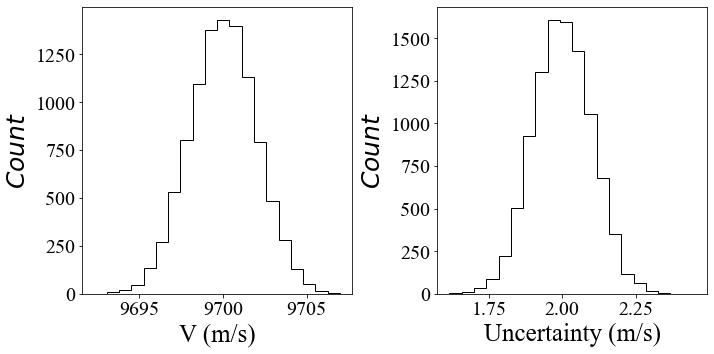

In [117]:
# Create plot of the velocities and uncertainties
plt.clf()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.hist(v_measurements, color="k", label="Data", histtype='step', bins=20)

ax1.set_xlabel('V (m/s)', fontsize=25)
ax1.set_ylabel('$Count$', fontsize=25)

ax1.tick_params(labelsize=20)

ax2.hist(v_errors, color="k", label="Data", histtype='step', bins=20)

ax2.set_xlabel('Uncertainty (m/s)', fontsize=25)
ax2.set_ylabel('$Count$', fontsize=25)

ax2.tick_params(labelsize=20)

fig.tight_layout(pad=1.0)

The minimum $\chi^2$ velocity of the star $v_\chi$ minimises the quantity
\begin{align}
    s = \sum_i \frac{(d_i-v)^2}{\sigma_i}
\end{align}
where $d_i$ is the $i$th data point and $\sigma_i$ is the uncertainty on the $i$th data point. To find this value a search was performed in the range $9695$m/s$\leq v \leq 9705$m/s. The 90\% confidence interval can be evaluated using the minimum value of $s$, $s_{min}$. For this problem, for a given $v$, the $s$ calculated follows a $\chi^2$ distribution with $n$ degrees of freedom while $s_{min}$ follows a $\chi^2$ distribution with $n-1$ degrees of freedom. The difference, $\Delta s = s - s_{min}$ follows a $\chi^2$ distribution with one degree of freedom. 

In [118]:
# Calculate our chi2
def chi_2(measurements, errors, v):
    chi_2 = 0
    for measurement, error in zip(measurements, errors):
        chi_2 += (measurement - v)**2 / error
    return chi_2

In [119]:
# Scan across range with a large number of points
velocity_min = 9695
velocity_max = 9705
velocity_points = 50000
velocity_range = np.linspace(velocity_min, velocity_max, velocity_points)

In [120]:
# Calculate the chi2 for each test velocity
chi_2_values = []
for velocity in velocity_range:
    chi_2_values.append(chi_2(velocity_measurements, velocity_errors, velocity))

(0.0, 1653.3946795996862)

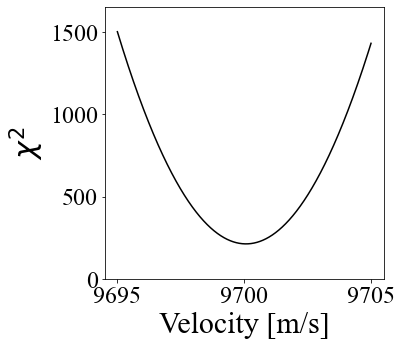

In [121]:
# Plot our chi2 values
fig = plt.figure(figsize=(5, 5))
plt.plot(velocity_range, chi_2_values, color="k", label="chi_2")

plt.xlabel('Velocity [m/s]', fontsize=30)
plt.ylabel('$\chi^2$', fontsize=30)

plt.tick_params(labelsize=24)

plt.ylim([0.0, 1.1 *np.max(chi_2_values)])

(0.0, 1653.3946795996862)

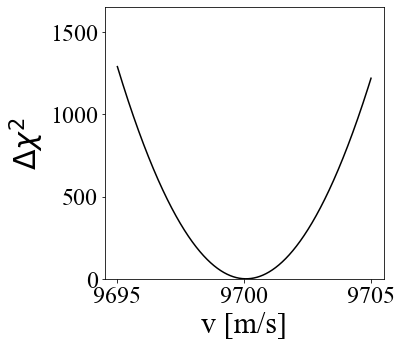

In [122]:
# Now find our minimum chi2
chi_2_min = np.min(chi_2_values)
chi_2_min_index = np.where(chi_2_values == chi_2_min)

chi_2_delta = chi_2_values - chi_2_min

fig = plt.figure(figsize=(5, 5))
plt.plot(velocity_range, chi_2_delta, color="k", label="chi_2")

plt.xlabel('v [m/s]', fontsize=30)
plt.ylabel('$\Delta \chi^2$', fontsize=30)

plt.tick_params(labelsize=24)

plt.ylim([0.0, 1.1 *np.max(chi_2_values)])

In [123]:
from scipy.stats import chi2

In [124]:
# Calculate chi2 difference for a given confidence interval
# We can input a lower guess for the target to speed things up
def calcualte_chi_2_target(confidence_interval, chi_2_target=0, chi_2_step= 1e-15):
    # While the chi2 integral is less than the confidence interval, increase the chi2 target
    while chi2.cdf(chi_2_target, 1) < confidence_interval:
        old_chi_2_target = chi_2_target
        chi_2_target += chi_2_step
    return(old_chi_2_target)

In [125]:
# Iteratively narrow chi2_step until suitable accuracy is found
confidence_interval = 0.9
chi_2_target = 0.0
chi_2_step = 0.01
while(chi_2_step > 1e-15):
    chi_2_target = calcualte_chi_2_target(confidence_interval, chi_2_target, chi_2_step)
    chi_2_step /= 10.0

In [126]:
# Now find the confidence limits for the velocity measurement
confidence_limits = []

# Seach lower end of chi2 values counting up
# If the chi2 is lower than the chi2 target, we have found the lower bound
for index, chi_2_value in enumerate(chi_2_delta):
    if chi_2_value < chi_2_target:
        confidence_limits.append(index)
        break

# Seach upper end of chi2 values counting down
# If the chi2 is lower than the chi2 target, we have found the upper bound
for index, chi_2_value in enumerate(chi_2_delta):
    if chi_2_delta[len(chi_2_delta) - index - 1] < chi_2_target:
        confidence_limits.append(len(chi_2_delta) - index - 1)
        break

In [127]:
velocity_value = velocity_range[chi_2_min_index]
velocity_limits = velocity_value - velocity_range[confidence_limits]
velocity_limits = np.average(np.abs(velocity_limits))

print(f'{confidence_interval}% Confidence Interval for V = {float(velocity_value):5.9} +- {velocity_limits:5.4}')

0.9% Confidence Interval for V = 9700.0703 +- 0.232


The posterior PDF of the star's velocity is given by
\begin{align}
    P(v|d) = \frac{P(d|v)P(v)}{P(d)}
\end{align}
where,
\begin{align}
    P(v) = \frac{\theta(v-9695)\theta(9705-v)}{10},
\end{align}
$P(d)$ is the evidence which is a normalisation factor, and
\begin{align}
    P(d|v) = \prod_{i} \frac{1}{\sqrt{2\pi} \sigma_i} e^{-\frac{(d_i - v)^2}{2\sigma_i^2}}
\end{align}

The following posterior was calcualted using Bayes Theorem.

In [138]:
# Need flat probabolity distributions for the prior
def flat_probability(x, x_low, x_high):
    return 1/float(x_high - x_low) * (x_low <= x) * (x <= x_high)

# Calcualte the probabilty of the model given the data
def probability_model_parameters(data, error, prediction):
    return np.prod((1 / (np.sqrt(2 * np.pi * error))) * np.exp(-(1/(2.0 * np.power(error, 2))) * np.power((data - prediction), 2)))

In [139]:
# Calcuate the posterior
def calculate_posterior(velocity_range):
    probability_velocity = 0
    numerators = []
    
    for velocity_value in velocity_range:
        # Calculate prior
        flat_probability_values = flat_probability(velocity_value, np.min(velocity_range), np.max(velocity_range))
        
        # Calculate model probability
        model_probability_values = probability_model_parameters(velocity_measurements, velocity_errors, velocity_value)
        
        numerators.append(flat_probability_values * model_probability_values)
        
        # Calcualte evidence
        probability_velocity += flat_probability_values * model_probability_values * (velocity_range[1] - velocity_range[0])

    velocity_posterior = numerators / probability_velocity
    return(velocity_posterior)

In [140]:
velocity_posterior = calculate_posterior(velocity_range)

(0.0, 2.2057959650129404)

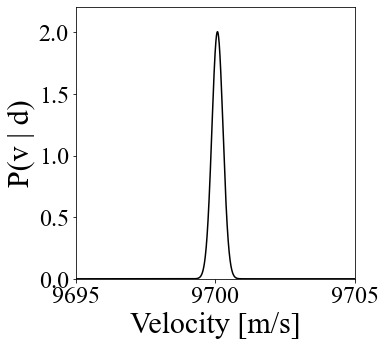

In [141]:
# Plot the posterior
fig = plt.figure(figsize=(5, 5))
plt.plot(velocity_range, velocity_posterior, color="k", label="P")

plt.xlabel('Velocity [m/s]', fontsize=30)
plt.ylabel('P(v | d)', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim(np.min(velocity_range), np.max(velocity_range))
plt.ylim(0.0, 1.1 * np.max(velocity_posterior))

As defined above, the posterior PDF of the star's velocity is given by
\begin{align}
    P(v|d) = \frac{P(d|v)P(v)}{P(d)}
\end{align}
where,
\begin{align}
    P(v) = \frac{\theta(v-9695)\theta(9705-v)}{10},
\end{align}
$P(d)$ is the evidence which is a normalisation factor, and
\begin{align}
    P(d|v) = \prod_{i} \frac{1}{\sqrt{2\pi} \sigma_i} e^{-\frac{(d_i - v)^2}{2\sigma_i^2}}
\end{align}

The following posterior PDF was constructed using a Markov Chain Monte Carlo (MCMC) analysis with Metropolis acceptance criteria, namely, construct a variable $a$, such that
\begin{align}
    a = \frac{P(v_p|d)}{P(v_c|d)}
\end{align}
where $v_p$ is the next proposed velocity in the MCMC and $v_c$ is the current velocity in the MCMC. Then,
\begin{align}
    &\text{if }a\geq 1,\ \ v_p \rightarrow v_c\\
    &\text{else, } v_p \rightarrow v_c \text{ with probability }a\\
    &v_p \rightarrow v_p \text{ with probability }1-a.
\end{align}
The next proposed velocity $v_p$ is calculated from the current velocity $v_c$, a step size $s_v$, and a random number, $r$, between 0 and 1.
\begin{align}
    v_p = v_c + s_v \text{ if } r<0.5 \\
    v_p = v_c - s_v \text{ if } r>0.5
\end{align}
The step size for the MCMC is calculated during a burn in phase, where the results are not recorded, but the number of successful jumps to $v_p$ is recorded. The step size after $N$ jumps is altered such that
\begin{align}
    s_v \rightarrow s_v \cdot \frac{N_{success}}{N\cdot T}
\end{align}
where $T$ is the target success rate for the MCMC. This phase is repeated until the difference between successive step sizes is below a certain threshold. This allows for a sensible choice of velocity step size to be made, and ensures a sufficient number of burn in steps in performed.

In [152]:
# Get the posterior numerator for a given velocity
# To be used in the acceptance function
def return_posterior_numerator(velocity):
    flat_probability_values = flat_probability(velocity, np.min(velocity_range), np.max(velocity_range))
    model_probability_values = probability_model_parameters(velocity_measurements, velocity_errors, velocity)
    return flat_probability_values * model_probability_values

In [153]:
# Get probability of acceptance for jumping to a new velocity value
def metro_acceptance(old_velocity, new_velocity):
    return return_posterior_numerator(new_velocity) / return_posterior_numerator(old_velocity)

In [154]:
# Return new value of velocity
# This might be the old value if the jump did not happen
# Also return whether the jump happend or not
def new_value(old_velocity, new_velocity):
    
    # Get probability of jumping to new value
    jump_probability = metro_acceptance(old_velocity, new_velocity)
    
    # If the posterior is higher than the old, then always jump
    if jump_probability > 1:
        return new_velocity, True
    # If the posterior is lower, then jump according to the probability
    elif np.random.random_sample() < jump_probability:
        return new_velocity, True
    else:
        return old_velocity, False

In [155]:
# Calcuate the next proposed jump, based on the step_size
def next_proposed_value(velocity_current, step_size):
    # Have a 50% of jumping forward or backward
    if np.random.random_sample() < 0.5:
        return velocity_current - step_size
    else:
        return velocity_current + step_size

In [156]:
# Calculate new step size based on proportion of successful jumps
# This is only used during burn-in
def calc_step_size(step_size, jumps, target_success):
    return step_size * (np.sum(jumps) / (len(jumps) * target_success))

In [157]:
# Give an idea of how long the MCMC will take
import tqdm

In [191]:
# Define our MCMC process
def mcmc(starting_step_size, step_size_tollerance, target_success, jumps_per_burn, jumps_mcmc):
    # Get starting step size
    step_size = starting_step_size
    # Old step size value to compare with the new step size
    # Burn in will end when the step size change is less than the tollerance
    step_size_old = starting_step_size - 1.0
    
    # Start at random velocity in range
    velocity_current = np.random.uniform(np.min(velocity_range), np.max(velocity_range))
    
    # Record the velocity values that are in the chain
    velocity_mcmc = []
    
    # Count the number of burn in periods
    n_burns = 0
    
    # Burn in will end when the step size change is less than the tollerance
    while (abs(step_size - step_size_old) > step_size_tollerance):
        n_burns += 1
        
        # Record whether a jump occured or not
        jumps = []
        
        # Perform a set number of jumps, then change step size to aim for the target success rate for jumping
        for burn in range(jumps_per_burn):
            
            # Perform the jumps, updating the current velocity and recording whether a jump happend
            # Do not record velocities until burn in is over
            velocity_current, changed = new_value(velocity_current, next_proposed_value(velocity_current, step_size))
            jumps.append(changed)
       
        # Calculate new step size
        step_size_old = step_size
        step_size = calc_step_size(step_size, jumps, target_success)
    
    # Print burn in information
    print(f'Number of burn ins = {n_burns}.')
    print(f'Number of burn jumps = {n_burns * jumps_per_burn:,}.')
    print(f'Step size = {step_size}, for target success = {target_success}.')
    
    # Now perform the MCMC with the fixed step size
    # Use tqdm to give idea of timings
    for n in tqdm.tqdm(range(jumps_mcmc)):
        
        # Update the current velocity
        velocity_current, changed = new_value(velocity_current, next_proposed_value(velocity_current, step_size))
        
        # Save velocity to build up posterior distribution
        velocity_mcmc.append(velocity_current)
    
    return velocity_mcmc, step_size

In [198]:
velocity_posterior_mcmc, final_step_size = mcmc(0.02, 1e-5, 0.975, 1000, 500000)

  0%|          | 1723/500000 [00:00<00:57, 8604.67it/s]

Number of burn ins = 23.
Number of burn jumps = 23,000.
Step size = 0.01567756141714597, for target success = 0.975.


100%|██████████| 500000/500000 [00:57<00:00, 8693.32it/s]


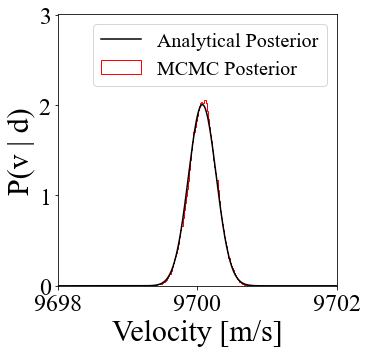

In [200]:
# Plot the posterior
plot_range = [9698, 9702]
n_bins = int(np.floor((plot_range[1] - plot_range[0]) / final_step_size))

fig = plt.figure(figsize=(5, 5))
plt.plot(velocity_range, velocity_posterior, color="k", label="Analytical Posterior")
plt.hist(velocity_posterior_mcmc, color="r", label="MCMC Posterior", bins=n_bins, range=plot_range, histtype='step', density=True)

plt.xlabel('Velocity [m/s]', fontsize=30)
plt.ylabel('P(v | d)', fontsize=30)

plt.tick_params(labelsize=24)

plt.xlim(plot_range)
plt.ylim(0.0, 1.5 * np.max(velocity_posterior))

plt.legend(fontsize=20)